In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cmocean.cm as cmo
#from utilities3 import *
import scipy.stats
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
from cycler import cycler

fh = 16
my_cycler = (cycler(color=['#94c8d8','#FE9A84','#296540','#E63F39','#C3AAD1',
              '#D5AC5A','#F4B6C3','#B4BCCA','#DBD468','#B1D3E1','#8b1821']))
plt.rcParams['figure.figsize'] = (18,12)
plt.rcParams['axes.prop_cycle'] = my_cycler
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = fh
plt.rcParams['xtick.labelsize'] = fh
plt.rcParams['ytick.labelsize'] = fh
plt.rcParams['axes.titlesize'] = fh+2

## testing

In [ ]:
alpha_path = '../alpha/2023_05_22/'
res = 128
var = 'num'
models = ['UNet','ResNet','FNO']
outs = {}

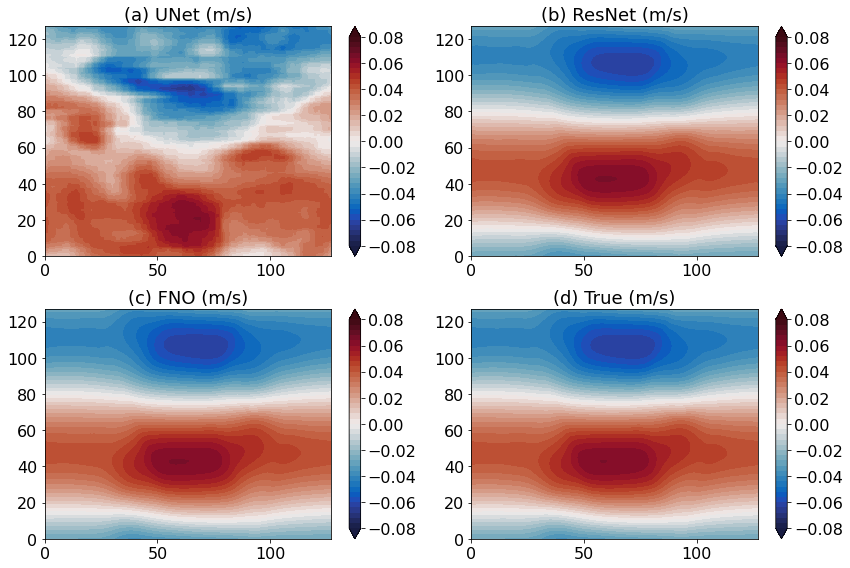

In [373]:
cranges = {}
#cranges['xvel'] = np.arange(-0.032,0.0322,0.002)
cranges['xvel'] = np.arange(-0.08,0.0801,0.004)
cranges['num'] = np.arange(0,240,10)
cranges['temp'] = np.arange(270.4,271,0.025)


ii = np.arange(res)
jj = np.arange(res)
index = ['(a)','(b)','(c)','(d)']

fig, axes = plt.subplots(2,2,figsize=(12,8))

for i,m in enumerate(outs):
    a = axes[i//2][i%2].contourf(ii, jj, outs[m][500,:,:],cranges[var],extend='both',cmap=cmo.balance)
    fig.colorbar(a,ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title(f'{index[i]} {m} ({units[var]})')
    
plt.tight_layout()
plt.savefig(f'figs/{var}_2d.pdf')

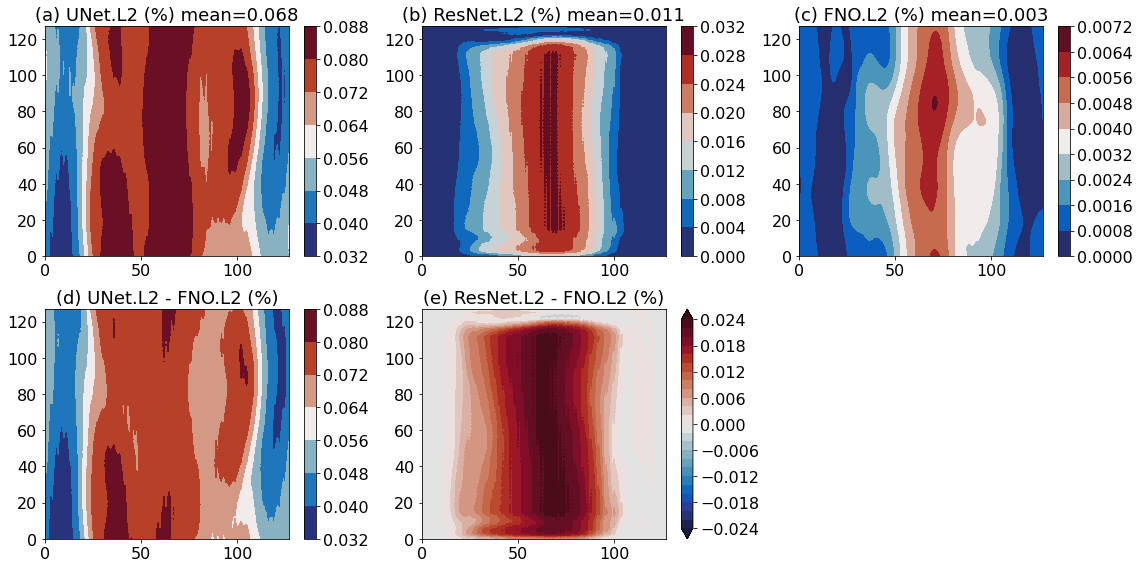

In [488]:
cranges = {}
#cranges['xvel'] = np.arange(-0.032,0.0322,0.002)
cranges['xvel'] = np.arange(0,1.5,0.1)
cranges['num'] = np.arange(0,240,10)
cranges['temp'] = np.arange(270.4,271,0.025)


ii = np.arange(res)
jj = np.arange(res)
index = ['(a)','(b)','(c)']

fig, axes = plt.subplots(2,3,figsize=(16,8))

for i,m in enumerate(models):
    mean_value = np.mean(corrs[m])
    #if m == 'UNet':
    a = axes[0][i].contourf(ii,jj, corrs[m],cmap=cmo.balance)
    #else:
    #    a = axes[0][i].contourf(ii,jj, corrs[m],cranges[var],extend='both',cmap=cmo.balance)
    fig.colorbar(a,ax=axes[0][i])
    axes[0][i].set_title(f'{index[i]} {m}.L2 (%) mean={mean_value:.3f}')


a = axes[1][0].contourf(ii,jj,corrs['UNet'] - corrs['FNO'],cmap=cmo.balance)
fig.colorbar(a,ax=axes[1][0])
axes[1][0].set_title(f'(d) UNet.L2 - FNO.L2 (%)')

cr = np.arange(-0.024,0.0241,0.002)
#cr = np.arange(-2,2.01,0.2)
a = axes[1][1].contourf(ii,jj,corrs['ResNet'] - corrs['FNO'],cr,extend='both',cmap=cmo.balance)
fig.colorbar(a,ax=axes[1][1])
axes[1][1].set_title(f'(e) ResNet.L2 - FNO.L2 (%)')

axes[1][2].axis('off')
    
plt.tight_layout()
plt.savefig(f'figs/{var}_2d_loss.pdf')

## super resolution

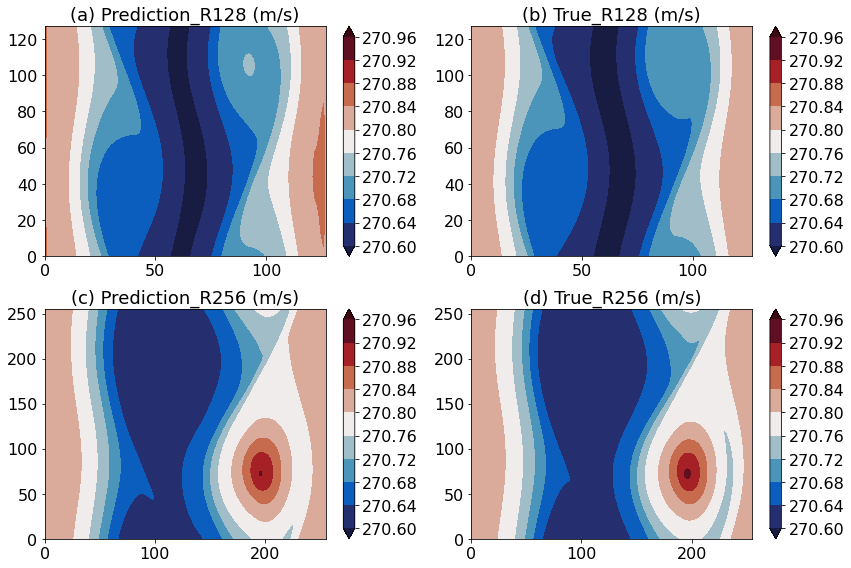

In [94]:
ress = [128,256]
var = 'temp'
sr_outs = {}
index1 = ['(a)','(c)']
index2 = ['(b)','(d)']

cranges = {}
cranges['xvel'] = np.arange(-0.12,0.1201,0.005)
cranges['temp'] = np.arange(270.60,270.961,0.04)

fig, axes = plt.subplots(2,2,figsize=(12,8),squeeze=False)
for k,res in enumerate(ress):
    ii = np.arange(res)
    jj = np.arange(res)

    pred = np.load(f"stests/FNO_out_{var}_r64_to_r_{res}.npy")[0,100,0,:,:] 
    aaa  = np.load(f"stests/FNO_out_{var}_r64_to_r_{res}.npy")[1,100,0,:,:]



    a1 = axes[k][0].contourf(ii,jj,pred,cranges[var],extend='both',cmap=cmo.balance)
    a2 = axes[k][1].contourf(ii,jj,aaa,cranges[var],extend='both',cmap=cmo.balance)
    #a1 = axes[k][0].contourf(ii,jj,pred,cmap=cmo.balance)
    #a2 = axes[k][1].contourf(ii,jj,aaa,cmap=cmo.balance)
    axes[k][0].set_title(f'{index1[k]} Prediction_R{res} (m/s)')
    axes[k][1].set_title(f'{index2[k]} True_R{res} (m/s)')

    fig.colorbar(a1, ax=axes[k][0])
    fig.colorbar(a2, ax=axes[k][1])

plt.tight_layout()
plt.savefig(f'figs/superR_{var}.pdf')

## init change

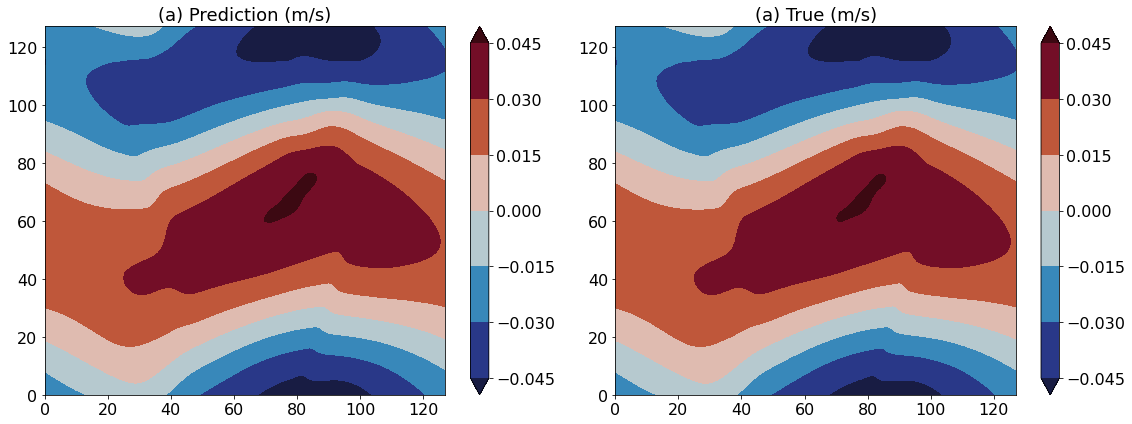

In [59]:
ress = [128]
var = 'xvel'
sr_outs = {}

index = ['(a)','(b)']
cranges = {}
cranges['xvel'] = np.arange(-0.045,0.0451,0.015)
cranges['temp'] = np.arange(270.50,270.901,0.04)

fig, axes = plt.subplots(1,2,figsize=(16,6))
for k,res in enumerate(ress):
    ii = np.arange(res)
    jj = np.arange(res)

    pred = np.load(f"itests/FNO_out_{var}_init2_to_init1.npy")[0,200,0,:,:] 
    aaa  = np.load(f"itests/FNO_out_{var}_init2_to_init1.npy")[1,200,0,:,:]

    a1 = axes[0].contourf(ii,jj,pred,cranges[var],extend='both',cmap=cmo.balance)
    a2 = axes[1].contourf(ii,jj,aaa,cranges[var],extend='both',cmap=cmo.balance)
    axes[0].set_title(f'{index[0]} Prediction (m/s)')
    axes[1].set_title(f'{index[0]} True (m/s)')

    fig.colorbar(a1, ax=axes[0])
    fig.colorbar(a2, ax=axes[1])

plt.tight_layout()
plt.savefig(f'figs/Dinit_{var}.pdf')

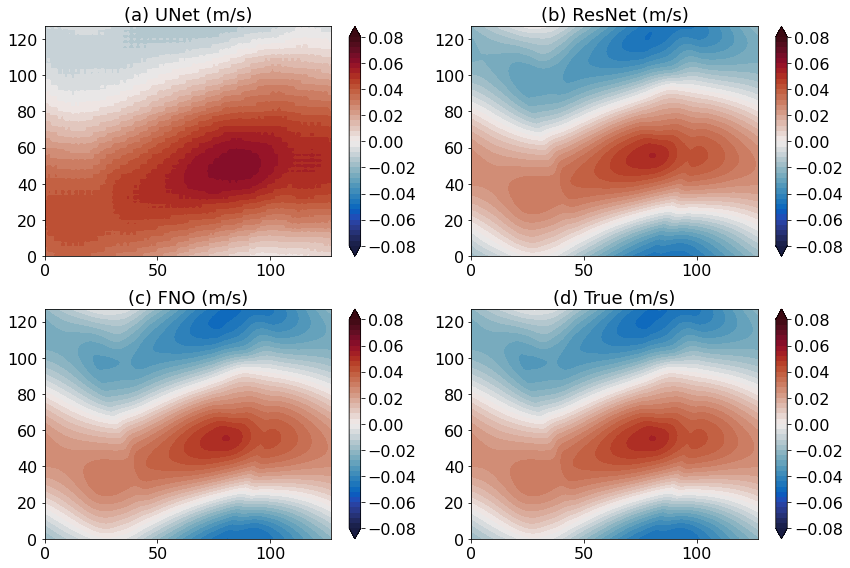

In [17]:
var = 'xvel'
res = 128
index = ['(a)','(b)','(c)','(d)']
cranges = {}
cranges['xvel'] = np.arange(-0.08,0.0801,0.004)
cranges['temp'] = np.arange(270.50,270.901,0.04)
ii = np.arange(res)
jj = np.arange(res)
units = {}
units['temp'] = 'k'
units['xvel'] = 'm/s'
units['num'] = ''

outs = {}
for m in models:
    outs[m] = np.load(f"itests/{m}_out_{var}_init2_to_init1.npy")[0,301,0,:,:]

outs['True'] = np.load(f"itests/FNO_out_{var}_init2_to_init1.npy")[1,301,0,:,:] 

fig, axes = plt.subplots(2,2,figsize=(12,8))

for i,m in enumerate(outs):
    a = axes[i//2][i%2].contourf(ii,jj, outs[m],cranges[var],extend='both',cmap=cmo.balance)
    #a = axes[i//2][i%2].contourf(ii,jj, outs[m],cmap=cmo.balance)
    fig.colorbar(a,ax=axes[i//2][i%2])
    axes[i//2][i%2].set_title(f'{index[i]} {m} ({units[var]})')

#for i,m in enumerate(models):
    
    
plt.tight_layout()
plt.savefig(f'figs/Dinit_{var}.pdf')

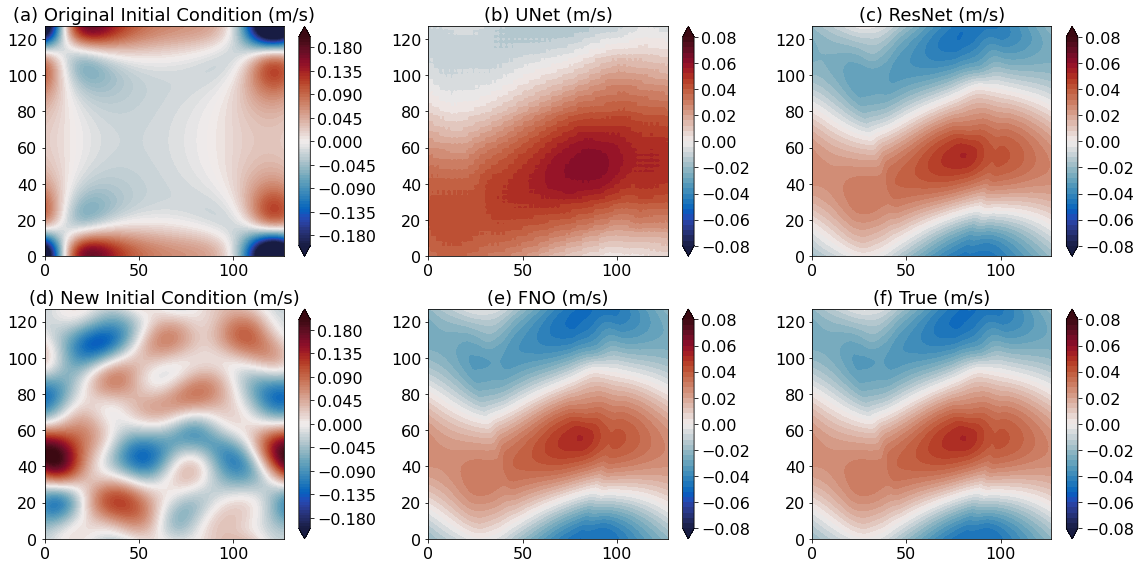

In [19]:
index = ['(b)','(c)','(e)','(f)']
var = 'xvel'
crs = {}
crs['temp'] = np.arange(270.64,270.961,0.002)
crs['xvel'] = np.arange(-0.20,0.201,0.005)


path=f'data/pr-dns/data/out-entrainment2dm_d_0.512_g_{res}_init2/pr_dns_{var}.npy'
data1 = np.load(path)
#data1 = data1.mean(axis=0)
data1 = data1[0,:,:] 

path=f'data/pr-dns/data/out-entrainment2dm_d_0.512_g_{res}_init1/pr_dns_{var}.npy'
data2 = np.load(path)
#data2 = data2.mean(axis=0)
data2 = data2[0,:,:]

fig, axes = plt.subplots(2,3,figsize=(16,8))
a = axes[0][0].contourf(ii,jj,data1,crs[var],extend='both',cmap=cmo.balance)
fig.colorbar(a,ax=axes[0][0])
axes[0][0].set_title(f'(a) Original Initial Condition ({units[var]})')

a = axes[1][0].contourf(ii,jj,data2,crs[var],extend='both',cmap=cmo.balance)
fig.colorbar(a,ax=axes[1][0])
axes[1][0].set_title(f'(d) New Initial Condition ({units[var]})')

outs = {}
for m in models:
    outs[m] = np.load(f"itests/{m}_out_{var}_init2_to_init1.npy")[0,301,0,:,:]

outs['True'] = np.load(f"itests/FNO_out_{var}_init2_to_init1.npy")[1,301,0,:,:] 


for i,m in enumerate(outs):
    a = axes[i//2][i%2+1].contourf(ii,jj, outs[m],cranges[var],extend='both',cmap=cmo.balance)
    #a = axes[i//2][i%2].contourf(ii,jj, outs[m],cmap=cmo.balance)
    fig.colorbar(a,ax=axes[i//2][i%2+1])
    axes[i//2][i%2+1].set_title(f'{index[i]} {m} ({units[var]})')


plt.tight_layout()
plt.savefig(f'figs/Dinit_{var}.pdf')

## compared different initial condition

In [ ]:
test_path = 'archived/20230410_v1/'
method = 'FN
